<a href="https://colab.research.google.com/github/TheKoray18/Linear-Regression-Multiple-Linear-Regression/blob/main/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Linear Regression

- Datamızı Çağırıyoruz

In [ ]:
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tesla_train.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1,255.559998,256.589996,250.509995,254.990005,254.990005,7176700
1,2,255.380005,260.950012,253.559998,260.720001,260.720001,4195000
2,3,260.329987,260.649994,255.020004,255.250000,255.250000,3604300
3,4,252.059998,254.559998,241.899994,242.179993,242.179993,4905800
4,5,236.000000,243.800003,230.509995,230.770004,230.770004,6590200
...,...,...,...,...,...,...,...
1230,1231,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,21489700
1231,1232,1405.000000,1417.260010,1311.339966,1365.880005,1365.880005,16311300
1232,1233,1396.989990,1408.560059,1351.280029,1394.280029,1394.280029,11717600
1233,1234,1396.000000,1548.920044,1376.010010,1544.650024,1544.650024,23337600


- Date sütununu datamızdan çıkarıyoruz

In [ ]:
data.drop('Date',axis=1,inplace=True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
0,255.559998,256.589996,250.509995,254.990005,254.990005,7176700
1,255.380005,260.950012,253.559998,260.720001,260.720001,4195000
2,260.329987,260.649994,255.020004,255.250000,255.250000,3604300
3,252.059998,254.559998,241.899994,242.179993,242.179993,4905800
4,236.000000,243.800003,230.509995,230.770004,230.770004,6590200
...,...,...,...,...,...,...
1230,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,21489700
1231,1405.000000,1417.260010,1311.339966,1365.880005,1365.880005,16311300
1232,1396.989990,1408.560059,1351.280029,1394.280029,1394.280029,11717600
1233,1396.000000,1548.920044,1376.010010,1544.650024,1544.650024,23337600


- Datamızın bilgierine bakıyoruz

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.0 KB


- Datamızın istatiksel değerlerine bakıyoruz

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,326.274081,332.998834,319.451781,326.494381,326.494381,8.080055e+06
std,175.247190,181.925242,168.824605,175.669603,175.669603,5.955280e+06
min,142.320007,154.970001,141.050003,143.669998,143.669998,7.080000e+05
25%,228.970001,231.519996,225.000000,228.760002,228.760002,4.358500e+06
50%,287.760010,295.000000,282.700012,289.459991,289.459991,6.257100e+06
75%,340.414993,346.985001,334.740005,340.990005,340.990005,9.467200e+06
max,1659.000000,1794.989990,1471.109985,1544.650024,1544.650024,6.093880e+07


- Datamız da NaN değer kontrolü yapıyoruz

In [ ]:
data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

<Figure size 216x216 with 0 Axes>

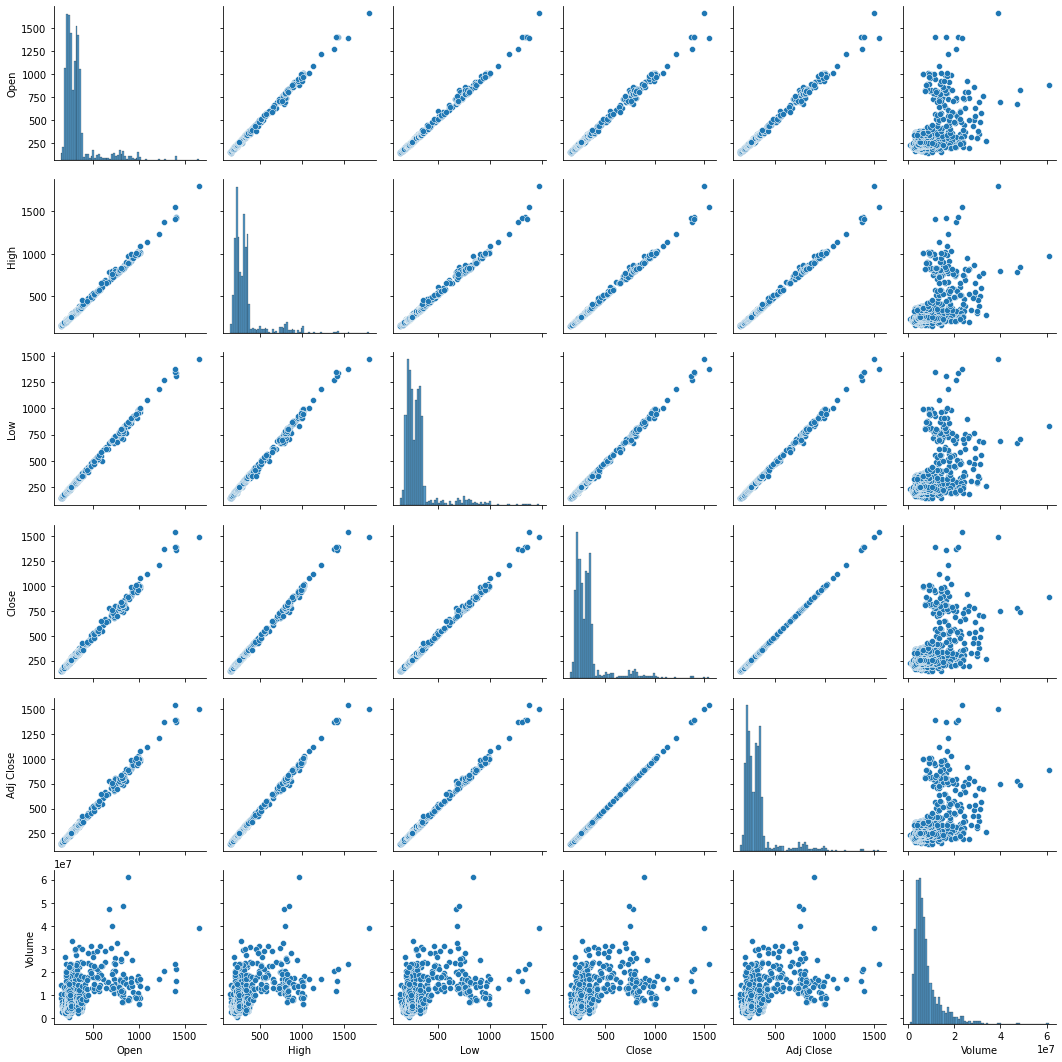

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3,3))
sns.pairplot(data)


- Datamızın Close ve Open sütunlarını görselleştirdik
- Aşağıdaki grafikte gördüğümüz gibi Open değerleri arttıkça Close değerleri de artıyor.Bu durumda diyebiliriz ki Open ve Close sütunu arasında Linear bir ilişki vardır

Text(0, 0.5, 'Close')

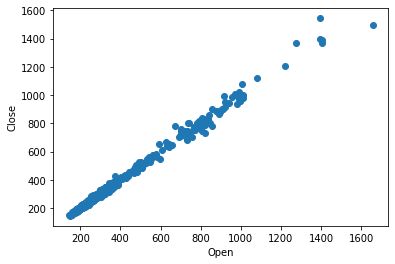

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Open'],data['Close'])
plt.xlabel("Open")
plt.ylabel("Close")

- Bizim Bağımlı değişkenimiz olacak olan Close sütununun datamızda ki diğer sütunlar ile ilişkisine bakıyoruz

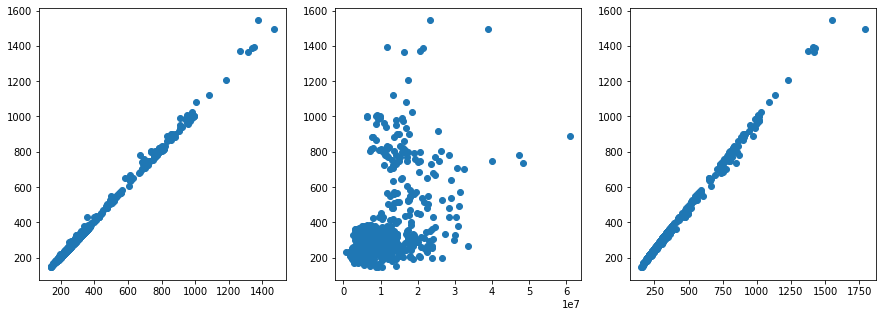

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(data['Low'],data['Close'])
plt.subplot(1,3,2)
plt.scatter(data['Volume'],data['Close'])
plt.subplot(1,3,3)
plt.scatter(data['High'],data['Close'])

- Seaborn içerisinden jointplot ile Regresyon grafiğini çizdiriyoruz

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


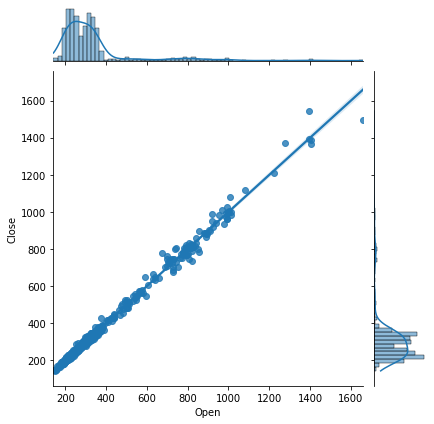

In [ ]:
import seaborn as sns

sns.jointplot(data['Open'],data['Close'],kind='reg')

- Bağımlı değişkenimiz Close ve aralarında linear bir ilişki olan Open ve High sütunlarımızın boxplot ile görselleştirerek bazı istatistiksel değerlerini gördük

- Aynı zaman da Bu değerleri yazdırdık

Close Median=289.459991
%25 = 228.760002
%75 = 340.9900055
Open Median=287.76001
%25 = 228.97000099999997
%75 = 340.414993
High Median=295.0
%25 = 231.5199965
%75 = 346.9850005


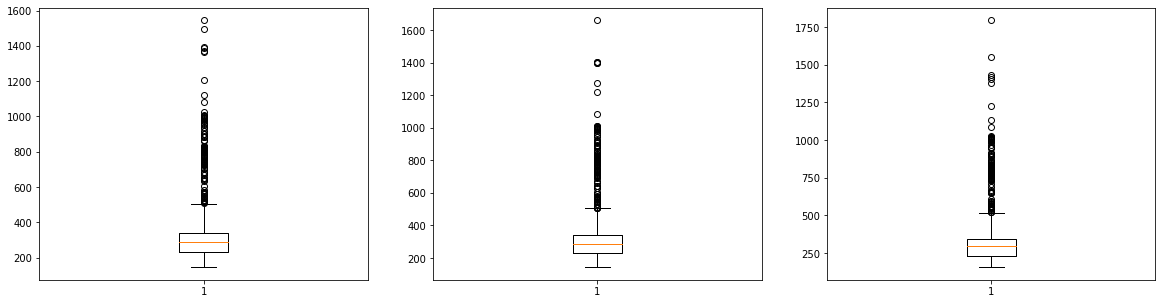

In [ ]:
import numpy as np
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.boxplot(data['Close'])
print('Close Median='+ str(np.median(data['Close'])))
print('%25 = '+str(np.percentile(data['Close'],25)))
print('%75 = '+str(np.percentile(data['Close'],75)))

plt.subplot(1,3,2)
plt.boxplot(data['Open'])
print('Open Median='+ str(np.median(data['Open'])))
print('%25 = '+str(np.percentile(data['Open'],25)))
print('%75 = '+str(np.percentile(data['Open'],75)))

plt.subplot(1,3,3)
plt.boxplot(data['High'])
print('High Median='+ str(np.median(data['High'])))
print('%25 = '+str(np.percentile(data['High'],25)))
print('%75 = '+str(np.percentile(data['High'],75)))

- Bağımlı değişkenimiz olan Close ile aralarında linear ilişki bulunmayan Volume sütunu boxplot ile görselleştirdik ve bazı istatiksel değerlerine baktık


Median=6257100.0
%25 = 4358500.0
%75 = 9467200.0


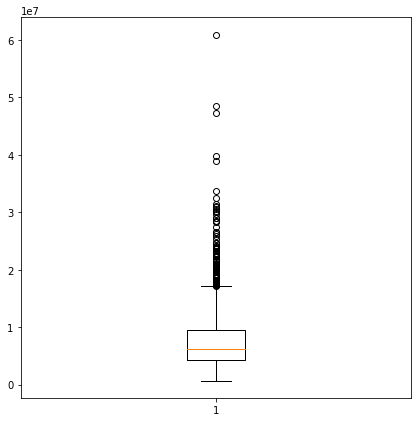

In [ ]:
plt.figure(figsize=(7,7))
plt.boxplot(data['Volume'])

print('Median='+ str(np.median(data['Volume'])))
print('%25 = '+str(np.percentile(data['Volume'],25)))
print('%75 = '+str(np.percentile(data['Volume'],75)))

- Bağımsız değişkenimizi datamızdan aldık
- Bağımlı değişkenimizi datamızdan aldık

In [ ]:
open  = data.iloc[:,0:1].values
close = data.iloc[:,3:4].values

In [ ]:
close

array([[ 254.990005],
       [ 260.720001],
       [ 255.25    ],
       ...,
       [1394.280029],
       [1544.650024],
       [1497.060059]])

In [ ]:
open

array([[ 255.559998],
       [ 255.380005],
       [ 260.329987],
       ...,
       [1396.98999 ],
       [1396.      ],
       [1659.      ]])

- Linear Regression kullanarak Close değerlerini tahmin eden model oluşturacağız

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(open,close)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Bağımlı ve Bağımsız değişkenlerimiz olan Close ve Open verilerinin grafiklerini daha önce çizmiştik.Şimdi o grafik üzerinde tahmin verilerimizin çizgisini çizeceğiz.

Text(1300, 1200, 'Prediction Line')

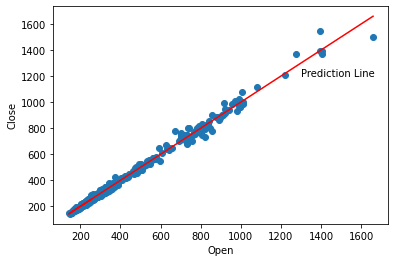

In [ ]:
tahmin = lin_reg.predict(open)

plt.scatter(open,close)
plt.plot(open,tahmin,c='r')
plt.xlabel("Open")
plt.ylabel("Close")
plt.annotate("Prediction Line",xy=(1300,1200))

- Şimdi bizim gireceğimiz Open değerinin Close değerini tahmin ettireceğiz

In [ ]:
lin_reg.predict([[245.67]])

array([[245.92498301]])

- Open değerini 245.67 olarak girdim.Close değerini de 245.92498301 olarak tahmin etti.
- Bu şekilde istediğimiz değerini tahmin edebiliriz.Tek dikkat etmemiz gereken gireceğimiz değerin 2 Boyutlu olması lazım.Onu da "[ [ ] ]" ile çözebiliriz

- Biz linear regression yani doğrusal bağlanım kullandık.Open ve Close arasındaki ilişkiyi gösteren bir model oluşturduk. 
- Bu ilişkinin matematiksel gösterimi , denklemi ;

       " y = B0 + B1.x " dir.

y = Close değerimiz

B0 = Grafikte bir tahmin doğrusu oluşturmuştuk.O doğrunun y noktasını kestiği noktadır

B1 = O doğrunun eğimidir

x = Bizim bağımsız değişkenimizin değeridir.Yani Open değeri

- Şimdi bu B0 ve B1 katsayılarını hesaplayacağız

In [ ]:
Bo = lin_reg.intercept_
B1 = lin_reg.coef_

In [ ]:
print("B0 = " ,Bo)
print("B1 = " ,B1)

B0 =  [0.36069294]
B1 =  [[0.99956971]]


- Biz yukarıda Open değerini 245.67 girmiştik ve bir Close tahmin değeri almıştık.Şimdi bunu denklem üzerinden kontrol edeceğiz

   y=0.36069294 + (0.99956971  *  245.67 ) bu işlemin sonucunun 245.92498301 olması lazım.Şİmdi onu test edeceğiz

In [ ]:
close_head = 0.36069294 + (0.99956971 * 245.67)

In [ ]:
close_head

245.92498359569998

- Tahmin doğrusunun matematiksel ifadesini kullanarak bulmuş olduğumuz close_head değeri ile modelin .predict() metodu ile bulduğumuz değer aynıdır


# Multiple Linear Regression

- Bizim yukarıda bir tane bağımsız değişkenimiz vardı.O da Open idi.
- Ama şimdi 3 tane bağımsız değişkenimiz olacak.Bu bağımsız değişkenlerimiz de Close bağımlı değişkenimiz ile linear ilişkiye sahip olan sütunlarımız.
- Şimdi bunların linear regression ile tahmin modeli oluşturacağız

In [ ]:
data.drop(['Close','Adj Close','Volume'],axis=1,inplace=True)

- Close sütunumuz ile linear lişkisi olmayan Volume sütununu da datamızdan siliyoruz
- Datamızda sadece bağımsız değişkenlerimiz olan Open,High ve Low sütunlarımız olacak  

In [ ]:
data

,Open,High,Low
0,255.559998,256.589996,250.509995
1,255.380005,260.950012,253.559998
2,260.329987,260.649994,255.020004
3,252.059998,254.559998,241.899994
4,236.000000,243.800003,230.509995
...,...,...,...
1230,1405.010010,1429.500000,1336.709961
1231,1405.000000,1417.260010,1311.339966
1232,1396.989990,1408.560059,1351.280029
1233,1396.000000,1548.920044,1376.010010


- Linear Regression ile Bağımsız değişkenimiz olan data'mız ve Bağımlı değişkenimiz Close'u fit ediyoruz  

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(data,close)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Modelimizi fit ettikten sonra şimdi predict yapıyoruz.
- Tek bağımsız değişkenimiz olan modelde predict metodunu kullanırken tek bir sayı yazıyorduk.Fakat Multiple Linear Regression da birden fazla bağımsız değişkenimiz olacağından predict() içerisine bağımsız değişkenimiz kadar değer vermemiz gerekecek.
- Bizim Open,High ve Low olmak üzere 3 tane bağımsız değişkenimiz olacak.Bu yüzden predict() içerisine yazacağımız ilk değer Open değeri,2. değer High değeri,3. değer ise Low değeri olacaktır.Şöyle gösterecek olursak;

--> .predict( [ [ Open değeri,High değeri,Low değeri ] ] )

- Open değer = 245.67
- High değer = 270.78
- Low değer = 244.34  şeklinde girdim. Bakalım bu değerlere sahip olduğumuz da close değerimiz ne olacak

In [ ]:
lin_reg.predict([[245.67,270.78,244.34]])

array([[263.55264436]])

- Close değerimizi 263.55264436 olarak verdi


- Modelin Matematik denklemini ifade edecek olursak ;
    
    y = B0 + B1 * X1 + B2 * X2 + B3 * X3 

- Burada B1,B2 ve B3 bizim coefficient katsayılarımız
- X1,X2 ve X3 ise sırasıyla bizim bağımsız değişkenlerimiz olan Open,High ve Low değerlerimiz
- Yukarıda predict ile tahmin ettiğimiz Close değerini şimdi bu denklemi kullanarak hesaplayacağız.Ama ilk önce y eksenini kesen nokta olan B0 katsayısını ve B1,B2,B3 eğimlerimizin değerlerini bulmamız gerekiyor

In [ ]:
B_0 =lin_reg.intercept_

Coeff= lin_reg.coef_

In [ ]:
print(B_0)
print(Coeff)

[-1.40321226]
[[-0.68967306  0.71365475  0.98692152]]


- B0  = -1.40321226 
- B1 , B2 , B3 = -0.68967306  0.71365475  0.98692152
 
- Eksen kestiği noktayı ve eğimlerimizi bulduk
- Şimdi bu değerleri yerine koyarak denklem üzerinden Close değerinin tahmin değerini bulalım 

- Yapacağımız işlem ;

  y_head = -1.40321226 + ((-0.68967306 * 245.67) + (0.71365475 * 270.78) + ( 0.98692152 * 244.34))

In [ ]:
 y_head = -1.40321226 + ((-0.68967306 * 245.67) + (0.71365475 * 270.78) + ( 0.98692152 * 244.34))

In [ ]:
y_head

263.5526444916

- Yukarıda gördüğünüz gibi denklem üzerindeki işlemimiz sonucunda bulduğumuz değer ile predict() metodu ile bulduğumuz değer aynı


- Bağımsız değişkenimiz data ile bağımlı değişkenimiz olan close ile train ve test dataları oluşturuyoruz

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,close,test_size=0.33,random_state=18)

- Datalarımızın boyutlarına bakıyoruz

In [ ]:
print("x_train = " ,x_train.shape)
print("x_test = ",x_test.shape)
print("y_train = ",y_train.shape)
print("y_test = ",y_test.shape)

x_train =  (827, 3)
x_test =  (408, 3)
y_train =  (827, 1)
y_test =  (408, 1)


- LinearRegression kullanarak x_train ve y_train datalarımız ile fit ediyoruz.Train ediyoruz


In [ ]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- LinearRegression ile x_test datasını kullanarak tahmin verileri oluşturuyoruz.- Bu tahmin verilerimizin olduğu pred datasını da bizim gerçek değerlerimizin olduğu y_test datamız ile karşılaştıracağız

In [ ]:
pred = lin_reg.predict(x_test)

- Aşağıda ilk 20 veri de y_test ile pred tahmin verilerini karşılaştırdık

In [ ]:
print("y_test = pred ")
for i in range(20):
  print("{} = {} ".format(y_test[i],pred[i]))

y_test = pred 
[370.] = [368.71058345] 
[254.990005] = [253.02605096] 
[337.140015] = [337.44042583] 
[229.009995] = [229.1134069] 
[312.5] = [316.65032671] 
[273.26001] = [274.19343312] 
[223.509995] = [224.96330369] 
[295.390015] = [298.08605091] 
[288.950012] = [291.11644792] 
[204.5] = [208.35355225] 
[224.520004] = [222.64736571] 
[338.690002] = [336.692077] 
[355.329987] = [355.57982869] 
[331.529999] = [330.34754757] 
[372.23999] = [374.6524543] 
[805.809998] = [818.28247946] 
[190.339996] = [187.98786385] 
[319.570007] = [317.06260794] 
[317.220001] = [321.31421529] 
[230.610001] = [226.71927067] 


- Şimdi Mean Squared Error hesaplayacağız.Bunun sonucunda Close verilerimiz ile tahmin doğrusu arasındaki farkın karesini hesaplayarak hatalı tahminlerimiz toplamının değerini göreceğiz


In [ ]:
import numpy as np

ms_error = np.square(np.subtract(y_test,pred)).mean()

- Mean Squared Error değerimizi bulduk aşağıda gördüğünüz gibi

In [ ]:
print("Mean Squared Eror = " + str(ms_error))

Mean Squared Eror = 33.181709386525256


- Mean Squared Error değerimizin Kare kökü alınmış hali de bize Root Mean Square Error değerini verecektir

In [ ]:
rms_error = np.sqrt(np.square(np.subtract(y_test,pred)).mean())

In [ ]:
print("Root Mean Square Error = " + str(rms_error))

Root Mean Square Error = 5.760356706535218


- Biz yukarıda Mean Squared Error hesaplarken numpy ile kendimiz hesap yapmıştık
- İstersek sklearn içinde mean_squared_error adında bir method var ve biz işlem yapmamıza gerek kalmadan hesaplama yapıyor

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,pred)

In [ ]:
print("Mean Squared Error = " + str(mse))

Mean Squared Error = 33.181709386525256


In [ ]:
rmse = np.sqrt(mse)

print("Root Mean Square Error = " + str(rmse))

Root Mean Square Error = 5.760356706535218


- Yukarıda gördüğünüz gibi Mean Squared Error ve Root Mean Squared Error değerlerini numpy ile de hesaplayabiliriz , sklearn içinde ki method ile de hesaplama yapabiliriz.

- Root Mean Square Error değerinin yüksek ya da düşük olduğunu Bağımlı değişkenin standart sapması ile karşılaştırarak değerlendiririz.

In [ ]:
print(np.std(close))

175.5984668837788


- Modelimizin iyi mi kötü mü olduğunu ölçmek için r2_score methodu kullanılır
- r2 değeri 0 ile 1 arasında değerler döndürür.Bu değerin 0'a yakın olması regresyon model uyumunun kötü olduğunu, 1'e yakın olması regresyon model uyumunun iyi olduğunu gösterir

In [ ]:
from sklearn.metrics import r2_score

rscre = r2_score(y_test,pred)

print("r2_score = " +str(rscre))

r2_score = 0.9990138029690504
